In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [2]:
trn = pd.read_csv('trn.csv',header = 0)
ts= pd.read_csv('ts.csv',header = 0)

In [19]:
def Write(out,test):    
    df2 = pd.DataFrame(dict(prediction=out,bidder_id=test['bidder_id']))
    df2.to_csv('out.csv', header = True, index=False)       
    df2.head(2)

In [3]:
def Write(out,bidderId):    
    df2 = pd.DataFrame(dict(prediction=out,bidder_id=bidderId))
    df2.to_csv('out.csv', header = True, index=False)       

In [4]:
outcome=trn.outcome.values
trn=trn.drop(['outcome', 'bidder_id'],axis = 1)
tsBidderId=ts.bidder_id.values
ts=ts.drop(['bidder_id'],axis = 1)
print(outcome)


[0 0 0 ..., 0 0 0]


In [5]:
trn.head()

,cnt,dis.auctions.frac,dis.countries.frac,dis.devices.frac,dis.ip.frac,dis.merchandise.frac,dis.url.frac,us.rate,de.rate,th.rate,...,ru.155.rate,v.url.rate,ip155.rate,sport.rate,mobile.rate,jewelry.rate,home.rate,office.rate,comp.rate,auto.rate
0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0,1.000000,0,0,0,1,0,0,0,0
1,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0,0.000000,0,0,1,0,0,0,0,0
2,141,0.524823,0.113475,0.475177,0.730496,0.007092,0.595745,0.042553,0.000000,0.021277,...,0,0.134752,0,0,0,0,0,0,0,0
3,3,1.000000,0.666667,1.000000,1.000000,0.333333,0.333333,0.333333,0.000000,0.000000,...,0,1.000000,0,0,0,0,0,1,0,0
4,543,0.031308,0.132597,0.303867,0.732965,0.001842,0.007366,0.003683,0.001842,0.003683,...,0,0.977901,0,0,0,1,0,0,0,0


In [6]:
ts.head()

,cnt,dis.auctions.frac,dis.countries.frac,dis.devices.frac,dis.ip.frac,dis.merchandise.frac,dis.url.frac,us.rate,de.rate,th.rate,...,ru.155.rate,v.url.rate,ip155.rate,sport.rate,mobile.rate,jewelry.rate,comp.rate,home.rate,office.rate,auto.rate
0,2,0.500000,0.500000,1.000000,0.500000,0.500000,0.500000,0.000000,0.00000,0.000000,...,0,1.000000,0,0,1,0,0,0,0,0
1,3,1.000000,0.333333,1.000000,1.000000,0.333333,0.666667,0.000000,0.00000,0.000000,...,0,0.333333,0,0,1,0,0,0,0,0
2,20,0.650000,0.050000,0.400000,0.500000,0.050000,0.350000,0.000000,0.00000,0.000000,...,0,0.550000,0,0,0,0,0,1,0,0
3,68,0.073529,0.058824,0.088235,0.147059,0.014706,0.044118,0.647059,0.00000,0.000000,...,0,0.779412,0,0,0,0,0,1,0,0
4,10939,0.037298,0.006765,0.047354,0.178353,0.000091,0.177073,0.032818,0.00841,0.000274,...,0,0.071944,0,0,1,0,0,0,0,0


In [67]:
trn.columns.values

array(['cnt', 'dis.auctions.frac', 'dis.countries.frac',
       'dis.devices.frac', 'dis.ip.frac', 'dis.merchandise.frac',
       'dis.url.frac', 'us.rate', 'de.rate', 'th.rate', 'v.url.rate',
       'ip155.rate', 'mobile.rate'], dtype=object)

In [54]:
ts.columns.values

array(['bidder_id', 'cnt', 'dis.auctions.frac', 'dis.countries.frac',
       'dis.devices.frac', 'dis.ip.frac', 'dis.merchandise.frac',
       'dis.url.frac', 'us.rate', 'de.rate', 'th.rate', 'v.url.rate',
       'ip155.rate', 'sport.rate', 'mobile.rate', 'jewelry.rate',
       'comp.rate', 'home.rate', 'office.rate', 'auto.rate'], dtype=object)

In [5]:
def Imp_plot(train, imp):
    names=train.columns
    imp, names=zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)),names)
    plt.xlabel('Importance of Features')
    plt.ylabel('Features')
    plt.title('Importance of Each Feature')
    plt.show()

In [7]:
trn=trn.drop(['auto.rate', 'office.rate'], axis = 1)
ts=ts.drop(['auto.rate', 'office.rate'], axis = 1)

In [8]:
trn=trn.drop(['comp.rate'],axis = 1)
ts=ts.drop(['comp.rate'],axis = 1)

In [9]:
trn=trn.drop(['home.rate'],axis = 1)
ts=ts.drop(['home.rate'],axis = 1)

In [10]:
trn=trn.drop(['sport.rate'],axis = 1)
ts=ts.drop(['sport.rate'],axis = 1)

In [11]:
trn=trn.drop(['mobile.rate'],axis = 1)
ts=ts.drop(['mobile.rate'],axis = 1)

In [12]:
trn=trn.drop(['v.us.sport.rate'],axis = 1)
ts=ts.drop(['v.us.sport.rate'],axis = 1)

In [37]:
trn=trn.drop(['jewelry.rate'],axis = 1)
ts=ts.drop(['jewelry.rate'],axis = 1)


In [13]:
trn=trn.drop(['ip155.rate'],axis = 1)
ts=ts.drop(['ip155.rate'],axis = 1)

In [17]:
trn=trn.drop(['us.rate','th.rate','de.rate'],axis = 1)
ts=ts.drop(['us.rate','th.rate','de.rate'],axis = 1)

In [144]:
trn=trn.drop(['dis.merchandise.frac', 'dis.ip.frac'],axis = 1)
ts=ts.drop(['dis.merchandise.frac', 'dis.ip.frac'],axis = 1)

In [23]:
trn=trn.drop(['cnt'],axis = 1)
ts=ts.drop(['cnt'],axis = 1)

In [28]:
trn=trn.drop(['v.url.rate', 'dis.countries.frac'],axis = 1)
ts=ts.drop(['v.url.rate', 'dis.countries.frac'],axis = 1)

In [40]:
trn=trn.drop(['dis.url.frac', 'dis.countries.frac'],axis = 1)
ts=ts.drop(['dis.url.frac', 'dis.countries.frac'],axis = 1)

In [25]:
trn=trn.drop(['ng.sport.rate'],axis = 1)
ts=ts.drop(['ng.sport.rate'],axis = 1)

In [64]:
ts.columns.values

array(['cnt', 'dis.auctions.frac', 'dis.countries.frac',
       'dis.devices.frac', 'dis.ip.frac', 'dis.merchandise.frac',
       'dis.url.frac', 'us.rate', 'de.rate', 'th.rate', 'us.sport.rate',
       'in.sport.rate', 'ng.sport.rate', 'in.jewel.rate', 'ru.155.rate',
       'v.url.rate', 'ip155.rate', 'jewelry.rate'], dtype=object)

In [147]:
trn2=trn[['dis.auctions.frac', 'dis.devices.frac', 'cnt', 'dis.countries.frac','v.url.rate']]
ts2=ts[['dis.auctions.frac', 'dis.devices.frac', 'cnt', 'dis.countries.frac','v.url.rate']]

In [121]:
trn3=trn[['dis.ip.frac', 'dis.merchandise.frac', 'ip155.rate', 'mobile.rate', 'us.rate', 'th.rate', 'de.rate']]
ts3=ts[['dis.ip.frac', 'dis.merchandise.frac', 'ip155.rate', 'mobile.rate', 'us.rate', 'th.rate', 'de.rate']]

In [122]:
trn4=trn[['dis.auctions.frac', 'dis.devices.frac', 'cnt', 'dis.countries.frac','v.url.rate']]
ts4=ts[['dis.auctions.frac', 'dis.devices.frac', 'cnt', 'dis.countries.frac','v.url.rate']]

In [14]:
trn4.head()

,auto.rate,office.rate,comp.rate,home.rate,sport.rate,jewelry.rate,cnt
0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,141
3,0,1,0,0,0,0,3
4,0,0,0,0,0,1,543


In [175]:
def RandForst(train, test, tgt):
    clf=RandomForestClassifier()
    params={'n_estimators':[50, 60, 70, 80, 120, 200],'max_features':[i for i in range(2,6)], 'max_depth':[11, 13, 15, 18, 21], 'min_samples_split':[7, 11, 13, 15, 18, 21, 24]}    
    #params={'n_estimators':[120],'max_features':[i for i in range(2,5)], 'max_depth':[9], 'min_samples_split':[7]}    

    gs=GridSearchCV(clf, params, cv=5, n_jobs=-1, scoring='roc_auc')
    gs.fit(train.values,tgt)
    print(gs.best_estimator_)
    print(gs.best_score_)
    print(gs.best_params_)
    print(gs.scorer_)

    clf2=RandomForestClassifier(n_jobs=-1,**gs.best_params_)
    clf2.fit(train, tgt)
    print(clf2.feature_importances_)
    Imp_plot(train, clf2.feature_importances_)
    outTrn=clf2.predict_proba(train.values)
    print(outTrn)
    outTst=clf2.predict_proba(test)
    
    del clf
    del gs
    del clf2
    
    return (outTrn,outTst)

In [ ]:
def RandForst(train, test, tgt, folds, params, rand_state):
    clf=RandomForestClassifier(random_state=rand_state)
    
    gs=GridSearchCV(clf, params, cv=folds, n_jobs=-1, scoring='roc_auc')
    gs.fit(train.values,tgt)
    print(gs.best_estimator_)
    print(gs.best_score_)
    print(gs.best_params_)
    print(gs.scorer_)
    #print(gs.grid_scores_)

    clf2=RandomForestClassifier(random_state=rand_state, n_jobs=-1, **gs.best_params_)
    clf2.fit(train,tgt)
    print(clf2.feature_importances_)
    Imp_plot(train, clf2.feature_importances_)
    outTrn=clf2.predict_proba(train.values)
    outTst=clf2.predict_proba(test)
    
    del clf
    del gs
    del clf2
    
    return (outTrn,outTst)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=11, max_features=4,
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=18, n_estimators=70, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)
0.920796999756
{'max_depth': 11, 'n_estimators': 70, 'min_samples_split': 18, 'max_features': 4}
make_scorer(roc_auc_score, needs_threshold=True)
[ 0.0744888   0.13389688  0.08952664  0.15783593  0.08276336  0.10104341
  0.10097545  0.03668924  0.04563829  0.03175508  0.01756335  0.0098582
  0.00366345  0.00896886  0.00270167  0.00731908  0.07342576  0.00862536
  0.00559447  0.00362254  0.00404417]


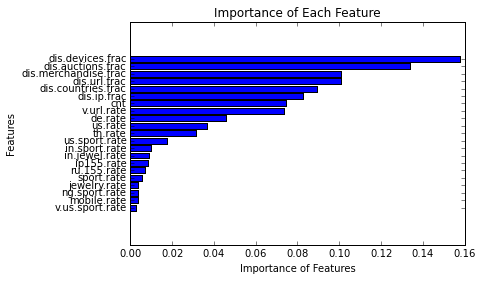

[[ 0.99700053  0.00299947]
 [ 0.97199009  0.02800991]
 [ 0.95025749  0.04974251]
 ..., 
 [ 0.98964135  0.01035865]
 [ 1.          0.        ]
 [ 0.99859939  0.00140061]]


ValueError: could not convert string to float: 'ffd62646d600b759a985d45918bd6f0431vmz'

In [165]:
(outTrnR,outTstR)=RandForst(trn,ts,outcome)

In [15]:
Write(outTstR[:,1], ts)

In [40]:
outTst[:,1]

array([ 0.03407738,  0.        ,  0.        , ...,  0.23917279,
        0.        ,  0.21575512])

In [106]:
def GBM(train,test,tgt):
    clf=GradientBoostingClassifier(random_state=11000)
    
    #params={'n_estimators':[100,250,400],'learning_rate':[0.05,0.1,.3],'max_features':[3,4,5,9], 'max_depth':[3, 5, 7, 9, 12],'min_samples_split':[2,4,7,9],'subsample':[0.5,0.75,1.0]}    
    params={'n_estimators':[600],'learning_rate':[0.01],'max_features':[3], 'max_depth':[5],'min_samples_split':[21],'subsample':[0.75]}    
    #params={'n_estimators':[500, 600, 700, 900],'learning_rate':[0.005, 0.01, 0.05, 0.1],'max_features':[3,4,5], 'max_depth':[4, 5, 7, 9, 13],'min_samples_split':[17, 19, 21, 23, 25],'subsample':[0.5, 0.75, 0.85]}    

    gs=GridSearchCV(clf, params, cv=10, n_jobs=-1, scoring='roc_auc')
    gs.fit(train.values,tgt)
    print(gs.best_estimator_)
    print(gs.best_score_)
    print(gs.best_params_)
    print(gs.scorer_)
    #print(gs.grid_scores_)

    clf2=GradientBoostingClassifier(random_state=11000, **gs.best_params_)
    clf2.fit(train,tgt)
    print(clf2.feature_importances_)
    Imp_plot(train, clf2.feature_importances_)
    outTrn=clf2.predict_proba(train.values)
    outTst=clf2.predict_proba(test)
    
    del clf
    del gs
    del clf2
    
    return (outTrn,outTst)

In [39]:
def GBM(train, test, tgt, folds, params, rand_state):
    clf=GradientBoostingClassifier(random_state=rand_state)
    
    gs=GridSearchCV(clf, params, cv=folds, n_jobs=-1, scoring='roc_auc')
    gs.fit(train.values,tgt)
    print(gs.best_estimator_)
    print(gs.best_score_)
    print(gs.best_params_)
    print(gs.scorer_)
    #print(gs.grid_scores_)

    clf2=GradientBoostingClassifier(random_state=rand_state, **gs.best_params_)
    clf2.fit(train,tgt)
    print(clf2.feature_importances_)
    Imp_plot(train, clf2.feature_importances_)
    outTrn=clf2.predict_proba(train.values)
    outTst=clf2.predict_proba(test)
    
    del clf
    del gs
    del clf2
    
    return (outTrn,outTst)

In [37]:
trn2=trn[['dis.auctions.frac', 'dis.devices.frac', 'cnt','jewelry.rate', 'dis.countries.frac','v.url.rate', 'dis.ip.frac','dis.url.frac','dis.merchandise.frac','v.url.rate','de.rate','us.rate','th.rate','in.jewel.rate','us.sport.rate','in.sport.rate','ru.155.rate']]
ts2=ts[['dis.auctions.frac', 'dis.devices.frac', 'cnt', 'jewelry.rate', 'dis.countries.frac','v.url.rate','dis.ip.frac','dis.url.frac','dis.merchandise.frac','v.url.rate','de.rate','us.rate','th.rate','in.jewel.rate','us.sport.rate','in.sport.rate','ru.155.rate']]

In [40]:
trn2=trn[['dis.auctions.frac', 'dis.devices.frac', 'cnt', 'dis.countries.frac','v.url.rate', 'dis.ip.frac','dis.url.frac','dis.merchandise.frac','v.url.rate','de.rate','us.rate','th.rate','in.jewel.rate','in.sport.rate','ru.155.rate']]
ts2=ts[['dis.auctions.frac', 'dis.devices.frac', 'cnt', 'dis.countries.frac','v.url.rate','dis.ip.frac','dis.url.frac','dis.merchandise.frac','v.url.rate','de.rate','us.rate','th.rate','in.jewel.rate','in.sport.rate','ru.155.rate']]

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=5, max_features=3, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=21, n_estimators=600,
              random_state=700, subsample=0.75, verbose=0,
              warm_start=False)
0.928377623032
{'n_estimators': 600, 'subsample': 0.75, 'max_features': 3, 'min_samples_split': 21, 'max_depth': 5, 'learning_rate': 0.01}
make_scorer(roc_auc_score, needs_threshold=True)
[ 0.08863753  0.13242177  0.09538618  0.12000715  0.1070751   0.10043541
  0.10055683  0.04199233  0.04414404  0.03785973  0.01278052  0.011994
  0.00634463  0.01611354  0.00860797  0.06377693  0.00834997  0.00351639]


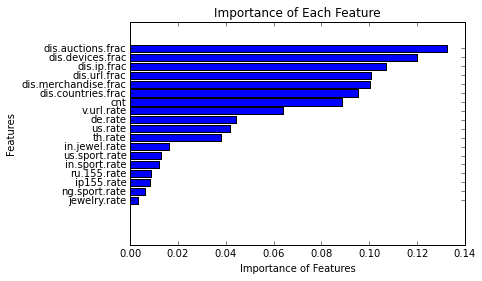

In [94]:
(outTrnG3,outTstG3)=GBM(trn,ts,outcome)

In [31]:
Write(outTstG3[:,1], tsBidderId)

NameError: name 'outTstG3' is not defined

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=5, max_features=3, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=21, n_estimators=585,
              random_state=999, subsample=0.7, verbose=0, warm_start=False)
0.922357635498
{'min_samples_split': 21, 'learning_rate': 0.01, 'subsample': 0.7, 'max_features': 3, 'n_estimators': 585, 'max_depth': 5}
make_scorer(roc_auc_score, needs_threshold=True)
[ 0.12971498  0.11409463  0.08632015  0.10058633  0.05030411  0.09500762
  0.10786883  0.09142502  0.05034305  0.04295267  0.03691734  0.04072413
  0.01522416  0.01617964  0.02233734]


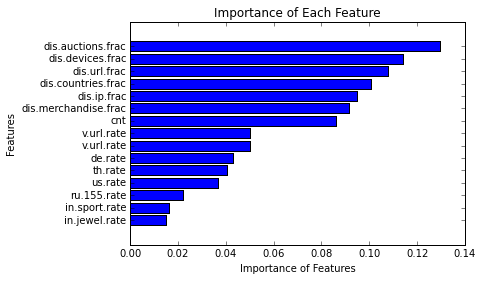

In [45]:
params={'n_estimators':[585],'learning_rate':[0.01],'max_features':[3, 4, 5], 'max_depth':[5, 6],'min_samples_split':[21, 23],'subsample':[0.5, 0.7]}    

(outTrnG2,outTstG2)=GBM(trn2, ts2, outcome, 2, params, rand_state=999)

In [44]:
Write(outTstG2[:,1], tsBidderId)

In [201]:
def ExtraTrees(train, test, tgt):
    clf=ExtraTreesClassifier()
    params={'n_estimators':[30, 40, 50, 60, 70, 80,120, 260],'max_features':[i for i in range(2,6)], 'max_depth':[14, 17, 19, 21, 24], 'min_samples_split':[13, 17, 20, 23, 26]}    
    #params={'n_estimators':[20, 30, 40, 50, 70],'max_features':[1,2,3], 'max_depth':[3,5,7,9], 'min_samples_split':[3,5,7,9,11]}    

    gs=GridSearchCV(clf, params, cv=3, n_jobs=-1, scoring='roc_auc')
    gs.fit(train.values,tgt)
    print(gs.best_estimator_)
    print(gs.best_score_)
    print(gs.best_params_)
    print(gs.scorer_)

    clf2=ExtraTreesClassifier(n_jobs=-1, **gs.best_params_)
    clf2.fit(train, tgt)
    print(clf2.feature_importances_)
    Imp_plot(train, clf2.feature_importances_)
    outTrn=clf2.predict_proba(train.values)
    print(outTrn)
    print(gs.grid_scores_)

    outTst=clf2.predict_proba(test)
    
    del clf
    del gs
    del clf2
    
    return (outTrn,outTst)

In [7]:
def ExtraTrees(train, test, tgt, folds, params, rand_state):
    clf=ExtraTreesClassifier(random_state=rand_state)
    
    gs=GridSearchCV(clf, params, cv=folds, n_jobs=-1, scoring='roc_auc')
    gs.fit(train.values,tgt)
    print(gs.best_estimator_)
    print(gs.best_score_)
    print(gs.best_params_)
    print(gs.scorer_)
    #print(gs.grid_scores_)

    clf2=ExtraTreesClassifier(random_state=rand_state, n_jobs=-1, **gs.best_params_)
    clf2.fit(train,tgt)
    print(clf2.feature_importances_)
    Imp_plot(train, clf2.feature_importances_)
    outTrn=clf2.predict_proba(train.values)
    outTst=clf2.predict_proba(test)
    
    del clf
    del gs
    del clf2
    
    return (outTrn,outTst)

In [33]:
trn2=trn[['dis.auctions.frac', 'dis.devices.frac', 'dis.countries.frac','v.url.rate', 'dis.ip.frac','dis.url.frac','dis.merchandise.frac']]
ts2=ts[['dis.auctions.frac', 'dis.devices.frac', 'dis.countries.frac','v.url.rate','dis.ip.frac','dis.url.frac','dis.merchandise.frac']]

ExtraTreesClassifier(bootstrap=False, compute_importances=None,
           criterion='gini', max_depth=14, max_features=2,
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=21, n_estimators=80, n_jobs=1,
           oob_score=False, random_state=100, verbose=0)
0.925099314996
{'min_samples_split': 21, 'max_features': 2, 'n_estimators': 80, 'max_depth': 14}
make_scorer(roc_auc_score, needs_threshold=True)
[ 0.17752049  0.22393246  0.1334544   0.11145549  0.16397569  0.10235345
  0.087308  ]


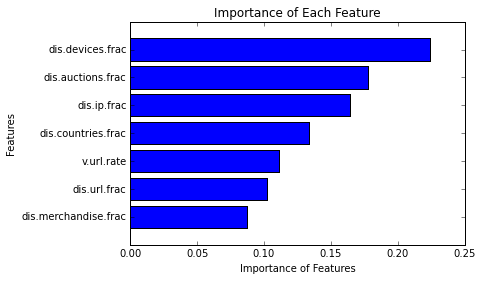

In [34]:
params={'n_estimators':[60, 70, 80],'max_features':[i for i in range(2,5)], 'max_depth':[14, 17, 20, 30], 'min_samples_split':[17, 21, 23, 26, 31]}    

(outTrnE,outTstE)=ExtraTrees(trn2, ts2, outcome, 3, params, 100)

In [35]:
Write(outTstE[:,1], tsBidderId)

ExtraTreesClassifier(bootstrap=False, compute_importances=None,
           criterion='gini', max_depth=21, max_features=5,
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=17, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0)
0.918024937893
{'max_depth': 21, 'max_features': 5, 'n_estimators': 50, 'min_samples_split': 17}
make_scorer(roc_auc_score, needs_threshold=True)
[ 0.03759553  0.16449361  0.07983105  0.16021522  0.10523355  0.04689749
  0.05959985  0.03470687  0.04927615  0.04941739  0.02925977  0.0161864
  0.01289545  0.01231142  0.01505515  0.01366646  0.07786258  0.0155399
  0.01995616]


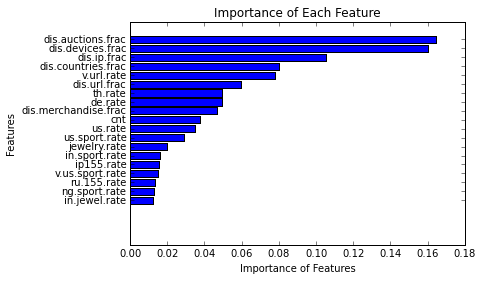

[[ 1.          0.        ]
 [ 0.97218954  0.02781046]
 [ 0.95074242  0.04925758]
 ..., 
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]]
[mean: 0.90336, std: 0.02982, params: {'max_depth': 14, 'max_features': 2, 'n_estimators': 30, 'min_samples_split': 13}, mean: 0.90970, std: 0.03370, params: {'max_depth': 14, 'max_features': 2, 'n_estimators': 40, 'min_samples_split': 13}, mean: 0.90423, std: 0.03363, params: {'max_depth': 14, 'min_samples_split': 13, 'n_estimators': 50, 'max_features': 2}, mean: 0.90221, std: 0.03546, params: {'max_depth': 14, 'min_samples_split': 13, 'n_estimators': 60, 'max_features': 2}, mean: 0.90659, std: 0.03377, params: {'max_depth': 14, 'min_samples_split': 13, 'n_estimators': 70, 'max_features': 2}, mean: 0.90299, std: 0.03653, params: {'max_depth': 14, 'max_features': 2, 'n_estimators': 80, 'min_samples_split': 13}, mean: 0.90938, std: 0.03189, params: {'max_depth': 14, 'max_features': 2, 'n_estimators': 120, 'min_samples_s

In [202]:
(outTrnE,outTstE)=ExtraTrees(trn, ts, outcome)

In [87]:
Write(outTstE[:,1], tsBidderId)

NameError: name 'outTstE' is not defined

In [134]:
def OptEnsembleParams(outR, outG, outE, tgt):
    optj= 0
    opk= 0
    optAUC=0
    temp=0
    for j in np.linspace(0,1,21):
        for k in np.linspace(0,1,21):
            if(j+k<=1):
                val=j*outR + k*outG + (1-j-k)*outE
                #print(tgt)
                temp=roc_auc_score(tgt, val)
                if temp>optAUC:
                    optAUC=temp
                    optj=j
                    optk=k
    return(optj, optk, optAUC)

In [136]:
(optj, optk, optAUC)=OptEnsembleParams(outTrnR[:,1], outTrnG[:,1], outTrnE[:,1], outcome)

In [137]:
print(optAUC)
print(optj)
print(optk)

0.986783917044
0.55
0.0


In [138]:
opt=0.55*outTstR[:,1]+ 0.05*outTstG[:,1] + 0.40*outTstE[:,1]

In [139]:
Write(opt, ts)

In [26]:
def SVM(train, test, tgt):
    clf=SVC(kernel='rbf', probability=True)
    params= {'C':[1,10,50,100,1000,10000], 'gamma': [0, 0.1, 0.01, 0.001, 0.0001,0.00001]}
    gs=GridSearchCV(clf, params, cv=5, n_jobs=-1, scoring='roc_auc')
    gs.fit(train.values,tgt)
    print(gs.best_estimator_)
    print(gs.best_score_)
    print(gs.best_params_)
    print(gs.scorer_)
    print(gs.grid_scores_)

    clf2=SVC(probability=True, **gs.best_params_)
    clf2.fit(train, tgt)
    outTrn=clf2.predict_proba(train.values)
    outTst=clf2.predict_proba(test.drop('bidder_id',1))
    
    del clf
    del gs
    del clf2
    
    return (outTrn,outTst)

In [27]:
(outTrnE,outTstE)=SVM(trn,ts,outcome)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.822161621363
{'gamma': 0, 'C': 1000}
make_scorer(roc_auc_score, needs_threshold=True)
[mean: 0.81012, std: 0.03301, params: {'gamma': 0, 'C': 1}, mean: 0.80053, std: 0.03549, params: {'gamma': 0.1, 'C': 1}, mean: 0.72469, std: 0.10902, params: {'gamma': 0.01, 'C': 1}, mean: 0.73465, std: 0.05543, params: {'gamma': 0.001, 'C': 1}, mean: 0.71690, std: 0.03171, params: {'gamma': 0.0001, 'C': 1}, mean: 0.65719, std: 0.12402, params: {'gamma': 1e-05, 'C': 1}, mean: 0.79301, std: 0.03224, params: {'gamma': 0, 'C': 10}, mean: 0.79204, std: 0.03567, params: {'gamma': 0.1, 'C': 10}, mean: 0.65150, std: 0.07221, params: {'gamma': 0.01, 'C': 10}, mean: 0.68580, std: 0.07695, params: {'gamma': 0.001, 'C': 10}, mean: 0.68853, std: 0.06648, params: {'gamma': 0.0001, 'C': 10}, mean: 0.65499, std: 0.10509, params: {

In [24]:
trn.head()

,cnt,dis.auctions.frac,dis.countries.frac,dis.devices.frac,dis.ip.frac,dis.merchandise.frac,dis.url.frac,us.rate,de.rate,th.rate,v.url.rate
0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
1,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
2,141,0.524823,0.113475,0.475177,0.730496,0.007092,0.595745,0.042553,0.000000,0.021277,0.134752
3,3,1.000000,0.666667,1.000000,1.000000,0.333333,0.333333,0.333333,0.000000,0.000000,1.000000
4,543,0.031308,0.132597,0.303867,0.732965,0.001842,0.007366,0.003683,0.001842,0.003683,0.977901


In [58]:
def LogReg(train, test, tgt):
    clf=LogisticRegression(penalty='l2')
    params= {'C':[.01,.1,.5, 1,10, 50, 100, 500, 1000, 10000, 25000, 70000, 150000, 1000000]}
    gs=GridSearchCV(clf, params, cv=10, n_jobs=-1, scoring='roc_auc')
    gs.fit(train.values,tgt)
    print(gs.best_estimator_)
    print(gs.best_score_)
    print(gs.best_params_)
    print(gs.scorer_)
    print(gs.grid_scores_)

    clf2=LogisticRegression(penalty='l2', **gs.best_params_)
    clf2.fit(train, tgt)
    outTrn=clf2.predict_proba(train.values)
    outTst=clf2.predict_proba(test)
    
    del clf
    del gs
    del clf2
    
    return (outTrn,outTst)

In [59]:
(outTrnL3,outTstL3)=LogReg(trn3,ts3,outcome)

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)
0.79425346386
{'C': 50}
make_scorer(roc_auc_score, needs_threshold=True)
[mean: 0.76696, std: 0.09324, params: {'C': 0.01}, mean: 0.78758, std: 0.08673, params: {'C': 0.1}, mean: 0.79044, std: 0.08788, params: {'C': 0.5}, mean: 0.79095, std: 0.09023, params: {'C': 1}, mean: 0.79107, std: 0.08630, params: {'C': 10}, mean: 0.79425, std: 0.08726, params: {'C': 50}, mean: 0.79113, std: 0.08645, params: {'C': 100}, mean: 0.79119, std: 0.08653, params: {'C': 500}, mean: 0.79139, std: 0.08667, params: {'C': 1000}, mean: 0.78920, std: 0.09138, params: {'C': 10000}, mean: 0.79406, std: 0.08717, params: {'C': 25000}, mean: 0.78991, std: 0.09196, params: {'C': 70000}, mean: 0.79134, std: 0.08659, params: {'C': 150000}, mean: 0.79237, std: 0.08721, params: {'C': 1000000}]


In [60]:
(outTrnL4,outTstL4)=LogReg(trn4,ts4,outcome)

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)
0.670130054219
{'C': 50}
make_scorer(roc_auc_score, needs_threshold=True)
[mean: 0.44992, std: 0.09539, params: {'C': 0.01}, mean: 0.60613, std: 0.10986, params: {'C': 0.1}, mean: 0.66154, std: 0.06850, params: {'C': 0.5}, mean: 0.65622, std: 0.07791, params: {'C': 1}, mean: 0.66443, std: 0.06033, params: {'C': 10}, mean: 0.67013, std: 0.06399, params: {'C': 50}, mean: 0.66146, std: 0.05870, params: {'C': 100}, mean: 0.66142, std: 0.05857, params: {'C': 500}, mean: 0.65987, std: 0.05848, params: {'C': 1000}, mean: 0.66092, std: 0.05609, params: {'C': 10000}, mean: 0.66273, std: 0.05665, params: {'C': 25000}, mean: 0.66054, std: 0.05618, params: {'C': 70000}, mean: 0.66273, std: 0.05665, params: {'C': 150000}, mean: 0.66534, std: 0.05537, params: {'C': 1000000}]


In [54]:
Write(outTstL[:,1], ts)

In [73]:
print(outTrnL3[:,1])

[ 0.00268225  0.00189649  0.05833858 ...,  0.01868553  0.02948937
  0.00373025]


In [80]:
trn2['outL4']=outTrnL4[:,1]
ts2['outL4']=outTstL4[:,1]

C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [108]:
trn2.head()

,dis.auctions.frac,dis.devices.frac,cnt,dis.countries.frac,v.url.rate,outL3,outE3
0,1.000000,1.000000,1,1.000000,1.000000,0.016064,0.016064
1,1.000000,1.000000,1,1.000000,0.000000,0.015891,0.015891
2,0.524823,0.475177,141,0.113475,0.134752,0.030420,0.030420
3,1.000000,1.000000,3,0.666667,1.000000,0.000380,0.000380
4,0.031308,0.303867,543,0.132597,0.977901,0.079478,0.079478


In [109]:
ts2.head()

,dis.auctions.frac,dis.devices.frac,cnt,dis.countries.frac,v.url.rate,outL3,outE3
0,0.500000,1.000000,2,0.500000,1.000000,0.001531,0.001531
1,1.000000,1.000000,3,0.333333,0.333333,0.000380,0.000380
2,0.650000,0.400000,20,0.050000,0.550000,0.007943,0.007943
3,0.073529,0.088235,68,0.058824,0.779412,0.219343,0.219343
4,0.037298,0.047354,10939,0.006765,0.071944,0.385311,0.385311


ExtraTreesClassifier(bootstrap=False, compute_importances=None,
           criterion='gini', max_depth=21, max_features=4,
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=23, n_estimators=60, n_jobs=1,
           oob_score=False, random_state=None, verbose=0)
0.890192342127
{'max_depth': 21, 'max_features': 4, 'n_estimators': 60, 'min_samples_split': 23}
make_scorer(roc_auc_score, needs_threshold=True)
[ 0.38296525  0.22899393  0.04959273  0.04720958  0.08066187  0.07804862
  0.13252801]


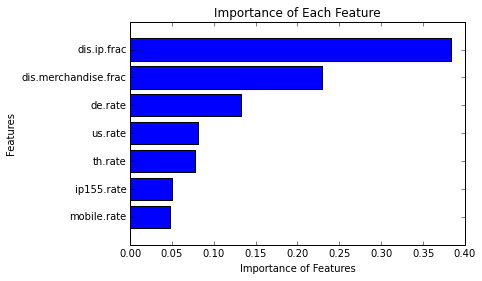

[[  9.83606557e-01   1.63934426e-02]
 [  9.84000000e-01   1.60000000e-02]
 [  9.75299745e-01   2.47002554e-02]
 ..., 
 [  1.00000000e+00   0.00000000e+00]
 [  9.99206349e-01   7.93650794e-04]
 [  9.98484848e-01   1.51515152e-03]]
[mean: 0.86948, std: 0.03774, params: {'max_depth': 14, 'max_features': 2, 'n_estimators': 30, 'min_samples_split': 13}, mean: 0.86785, std: 0.02631, params: {'max_depth': 14, 'min_samples_split': 13, 'n_estimators': 40, 'max_features': 2}, mean: 0.87851, std: 0.03425, params: {'max_depth': 14, 'n_estimators': 50, 'min_samples_split': 13, 'max_features': 2}, mean: 0.87318, std: 0.03610, params: {'max_depth': 14, 'min_samples_split': 13, 'n_estimators': 60, 'max_features': 2}, mean: 0.87131, std: 0.03183, params: {'max_depth': 14, 'min_samples_split': 13, 'n_estimators': 70, 'max_features': 2}, mean: 0.86812, std: 0.03792, params: {'max_depth': 14, 'n_estimators': 80, 'min_samples_split': 13, 'max_features': 2}, mean: 0.87455, std: 0.03009, params: {'max_depth'

In [117]:
(outTrnE3,outTstE3)=ExtraTrees(trn3, ts3, outcome)

In [118]:
trn2['outE3']=outTrnE3[:,1]
ts2['outE3']=outTstE3[:,1]

C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [115]:
Write(outTstEE[:,1],ts)

ExtraTreesClassifier(bootstrap=False, compute_importances=None,
           criterion='gini', max_depth=14, max_features=4,
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=17, n_estimators=40, n_jobs=1,
           oob_score=False, random_state=None, verbose=0)
0.925934086987
{'max_depth': 14, 'max_features': 4, 'n_estimators': 40, 'min_samples_split': 17}
make_scorer(roc_auc_score, needs_threshold=True)
[ 0.26211956  0.32614773  0.08905503  0.1490067   0.17367099]


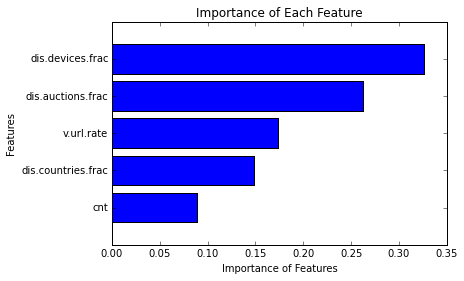

[[ 1.          0.        ]
 [ 0.97474747  0.02525253]
 [ 0.97496094  0.02503906]
 ..., 
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]]
[mean: 0.91036, std: 0.02316, params: {'max_depth': 14, 'n_estimators': 30, 'min_samples_split': 13, 'max_features': 2}, mean: 0.91971, std: 0.01713, params: {'max_depth': 14, 'max_features': 2, 'n_estimators': 40, 'min_samples_split': 13}, mean: 0.91999, std: 0.01494, params: {'max_depth': 14, 'max_features': 2, 'n_estimators': 50, 'min_samples_split': 13}, mean: 0.92263, std: 0.01872, params: {'max_depth': 14, 'min_samples_split': 13, 'n_estimators': 60, 'max_features': 2}, mean: 0.92111, std: 0.01822, params: {'max_depth': 14, 'max_features': 2, 'n_estimators': 70, 'min_samples_split': 13}, mean: 0.92443, std: 0.02119, params: {'max_depth': 14, 'min_samples_split': 13, 'n_estimators': 80, 'max_features': 2}, mean: 0.91987, std: 0.01748, params: {'max_depth': 14, 'min_samples_split': 13, 'n_estimators': 120, 'max_fea

In [123]:
(outTrnE4,outTstE4)=ExtraTrees(trn4, ts4, outcome)

In [94]:
Write(outTstE[:,1],ts)

In [124]:
trn2 = pd.DataFrame(dict(out3=outTrnE3[:,1],out4=outTrnE4[:,1]))
ts2 = pd.DataFrame(dict(out3=outTstE4[:,1],out4=outTstE4[:,1]))

In [127]:
ts2.head()

,out3,out4
0,0.029233,0.029233
1,0.000000,0.000000
2,0.000000,0.000000
3,0.136490,0.136490
4,0.233285,0.233285


GradientBoostingClassifier(init=None, learning_rate=0.05, loss='deviance',
              max_depth=5, max_features=1, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=5, n_estimators=130,
              random_state=None, subsample=0.75, verbose=0,
              warm_start=False)
0.988509727905
{'min_samples_split': 5, 'max_depth': 5, 'n_estimators': 130, 'max_features': 1, 'learning_rate': 0.05, 'subsample': 0.75}
make_scorer(roc_auc_score, needs_threshold=True)
[ 0.45495262  0.54504738]


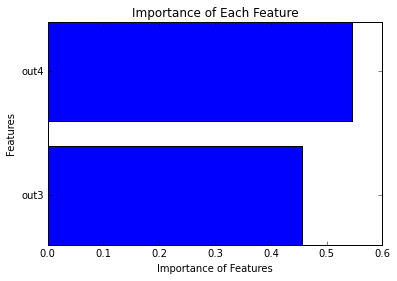

In [129]:
(outTrnG,outTstG)=GBM(trn2,ts2,outcome)

In [151]:
Write(outTstG[:,1], ts)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=11, max_features=2,
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=21, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)
0.912388754447
{'max_depth': 11, 'max_features': 2, 'min_samples_split': 21, 'n_estimators': 50}
make_scorer(roc_auc_score, needs_threshold=True)
[ 0.16498337  0.16333438  0.16043799  0.14778664  0.14423963  0.15349574
  0.06572225]


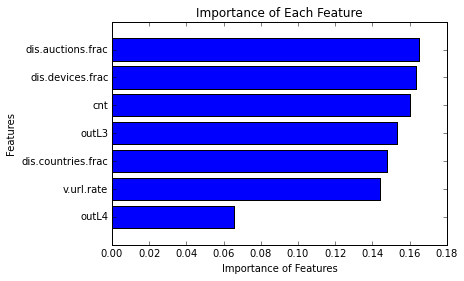

[[ 1.          0.        ]
 [ 0.97604312  0.02395688]
 [ 0.97774483  0.02225517]
 ..., 
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.9942328   0.0057672 ]]


ValueError: labels ['bidder_id'] not contained in axis

In [86]:
(outTrnR,outTstR)=RandForst(trn2,ts2,outcome)